<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/LogisticRegression_AI_Track_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Product being purchased through an advertisement on social media. We will be predicting the value of Purchased by considering gender, age and salary

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [2]:
import numpy as np
import pandas as pd

#Load Data

In [7]:
data = pd.read_csv("/content/drive/MyDrive/AI Data/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
data.drop(['User ID'], axis = 1, inplace = True)
# Checking for null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None


#Binary Conversion

In [9]:
# Converting the categorical variable into numerical
varlist =  ['Gender']

# Defining the map function
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

# Check the housing dataframe now
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


#Data Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Age', 'EstimatedSalary']
data[num_vars] = scaler.fit_transform(data[num_vars])

data

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0
...,...,...,...,...
395,0,0.666667,0.192593,1
396,1,0.785714,0.059259,1
397,0,0.761905,0.037037,1
398,1,0.428571,0.133333,0


#Data Split

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)


#Dividing the training data set into X and Y


In [12]:
y_train = df_train.pop('Purchased')
X_train = df_train
y_test = df_test.pop('Purchased')
X_test = df_test

#Model Training

In [17]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [20]:
print(" Training Accuracy",lr_model.score(X_train, y_train))
print(" Testing Accuracy",lr_model.score(X_test, y_test))

 Training Accuracy 0.8178571428571428
 Testing Accuracy 0.8


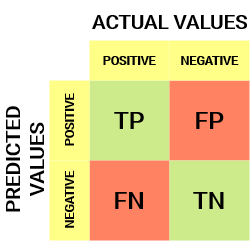

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[73,  2],
       [22, 23]])

In [40]:
confusion_matrix(y_train, y_pred_train)

array([[171,  11],
       [ 40,  58]])

#Precision tells us how many of the correctly predicted cases actually turned out to be positive.

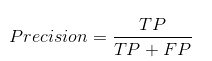

#Recall tells us how many of the actual positive cases we were able to predict correctly with our model.

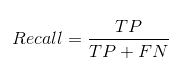

#F1-Score
In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value:

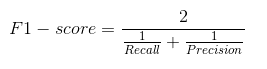

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics.

# Save Model

In [21]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))

# Deploy Model

In [36]:
list_of_columns = data.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['Purchased'], axis='columns', inplace=True)

input_data.at[0, 'Gender'] = input('enter Gender')
input_data.at[0, 'Age'] = int(input('enter Age'))
input_data.at[0, 'EstimatedSalary'] = int(input('enter Salary'))

# Defining the map function
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# Applying the function to the housing list
input_data[varlist] = input_data[varlist].apply(binary_map)


input_data['Age']=(input_data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
input_data['EstimatedSalary']=(input_data['EstimatedSalary']-data['EstimatedSalary'].min())/(data['EstimatedSalary'].max()-data['EstimatedSalary'].min())

y_pred =  lr_model.predict(input_data)

if(y_pred[0]==1):
  print('Will purchase product')
if(y_pred[0]==0):
  print('Will not purchase product')

enter GenderMale
enter Age19
enter Salary19000
Will purchase product


In [38]:
list_of_columns = data.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['Purchased'], axis='columns', inplace=True)

input_data.at[0, 'Gender'] = input('enter Gender')
input_data.at[0, 'Age'] = int(input('enter Age'))
input_data.at[0, 'EstimatedSalary'] = int(input('enter Salary'))

# Defining the map function
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# Applying the function to the housing list
input_data[varlist] = input_data[varlist].apply(binary_map)


input_data['Age']=(input_data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
input_data['EstimatedSalary']=(input_data['EstimatedSalary']-data['EstimatedSalary'].min())/(data['EstimatedSalary'].max()-data['EstimatedSalary'].min())

import pickle
model = pickle.load(open('model.pkl', 'rb'))
y_pred =  model.predict(input_data)

if(y_pred[0]==1):
  print('Will purchase product')
if(y_pred[0]==0):
  print('Will not purchase product')

enter GenderFemale
enter Age19
enter Salary19000
Will purchase product


# Thank you